In [1]:
import scipy.stats as stats
import pandas as pd
import tabulate
import models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def plot_residuals(result, variables):
    figure = plt.figure(figsize=(20,6))


    plots = len( variables)
    rows = (plots // 3) + 1

    residuals = np.array([r[0] for r in result["residuals"]])
    limits = max(np.abs(residuals.min()), residuals.max())
    
    n = result["n"]
    for i, variable in enumerate( variables):
        axes = figure.add_subplot(rows, 3, i + 1)

        keyed_values = sorted(zip(airBnB[variable].values, residuals), key=lambda x: x[ 0])
        ordered_residuals = [x[ 1] for x in keyed_values]

        axes.plot(list(range(0, n)), ordered_residuals, '.', color="dimgray", alpha=0.75)
        axes.axhline(y=0.0, xmin=0, xmax=n, c="firebrick", alpha=0.5)
        axes.set_ylim((-limits, limits))
        axes.set_ylabel("residuals")
        axes.set_xlabel(variable)

    plt.show()
    plt.close()
    
    return residuals

# Model

## Load Data

In [3]:
airBnb_csv = "airbnb_selected_variables.csv"
airBnB = pd.read_csv(airBnb_csv)

## Dummies

In [4]:
airBnB = pd.concat([airBnB, pd.get_dummies(airBnB["host_is_superhost"], prefix="superhost")], axis=1)
airBnB = pd.concat([airBnB, pd.get_dummies(airBnB["host_response_time"], prefix="host_response_time")], axis=1)
airBnB = pd.concat([airBnB, pd.get_dummies(airBnB["room_type"], prefix="room_type")], axis=1)
airBnB = pd.concat([airBnB, pd.get_dummies(airBnB["property_type"], prefix="property_type")], axis=1)
airBnB = pd.concat([airBnB, pd.get_dummies(airBnB["instant_bookable"], prefix="instant_bookable")], axis=1)
airBnB = pd.concat([airBnB, pd.get_dummies(airBnB["neighborhood_label"], prefix="neighborhood")], axis=1)
airBnB = pd.concat([airBnB, pd.get_dummies(airBnB["shared_private"], prefix="bath_type")], axis=1)

In [5]:
airBnB.head()

,id,price,bathrooms,bedrooms,beds,accommodates,host_is_superhost,host_response_time,room_type,property_type,...,property_type_hotel,property_type_house,property_type_unusual,instant_bookable_f,instant_bookable_t,neighborhood_high,neighborhood_low,neighborhood_medium,bath_type_private,bath_type_shared
0,0,20,1 private bath,1,1,2,f,within an hour,Private room,house,...,0,1,0,1,0,0,0,1,1,0
1,1,185,2.5 baths,3,3,8,f,within an hour,Entire home/apt,house,...,0,1,0,1,0,0,1,0,0,1
2,2,221,2 baths,2,2,4,f,within an hour,Entire home/apt,apt,...,0,0,0,1,0,0,0,1,0,1
3,3,142,1 bath,1,2,3,t,within an hour,Entire home/apt,house,...,0,1,0,0,1,0,0,1,0,1
4,4,398,2 baths,2,3,5,f,within an hour,Entire home/apt,apt,...,0,0,0,0,1,1,0,0,0,1


## Correlations

In [6]:
listCols = [['Column', 'r', 'rho']]
listCor = []
used = ['bedrooms', 'beds', 'accommodates', 'host_response_rate', 'host_acceptance_rate', 'number_of_reviews', 'review_scores_rating', 'reviews_per_month', 'num_baths', 
        'property_type_hotel', 'property_type_house', 'property_type_unusual', 'instant_bookable_f', 'instant_bookable_t', 'neighborhood_high', 'neighborhood_low', 'neighborhood_medium', 'bath_type_private', 'bath_type_shared']


for column in used:
    listCor.append(column)
    listCor.append( round(stats.pearsonr(airBnB.price, airBnB[column])[0], 2) )
    listCor.append( round(stats.spearmanr( airBnB.price, airBnB[column])[0], 2) )
    listCols.append(listCor)
    listCor = []
    
table = tabulate.tabulate(listCols, tablefmt='html')
table

Column,r,rho
bedrooms,0.39,0.42
beds,0.42,0.46
accommodates,0.51,0.55
host_response_rate,0.02,0.03
host_acceptance_rate,0.1,0.14
number_of_reviews,-0.05,-0.04
review_scores_rating,-0.05,0.0
reviews_per_month,0.0,0.01
num_baths,0.47,0.46
property_type_hotel,0.17,0.13


Bedrooms, beds, accommodates, and number of baths have strong relationships with price.

## All in Model

In [7]:
model = "price ~ bedrooms + beds + accommodates + host_response_rate + host_acceptance_rate + number_of_reviews + review_scores_rating + reviews_per_month + num_baths + property_type_hotel + property_type_house + instant_bookable_t + neighborhood_high + neighborhood_low + bath_type_private"
result1 = models.bootstrap_linear_regression(model, data=airBnB)
models.describe_bootstrap_lr(result1)

,,,95% BCI</strong,
Coefficients</strong,,Mean</strong,Lo</strong,Hi</strong
,$\beta_{0}$,40.84,25.16,54.76
bedrooms,$\beta_{1}$,6.33,3.16,10.38
beds,$\beta_{2}$,-6.10,-10.45,-0.54
accommodates,$\beta_{3}$,20.08,16.07,23.87
host_response_rate,$\beta_{4}$,-0.26,-0.34,-0.17
host_acceptance_rate,$\beta_{5}$,0.42,0.34,0.49
number_of_reviews,$\beta_{6}$,-0.06,-0.09,-0.02
review_scores_rating,$\beta_{7}$,-4.84,-6.50,-3.41
reviews_per_month,$\beta_{8}$,1.55,-1.39,4.54


## Improving the Model

In [8]:
predictions = {"bedrooms": "+", "beds": "+", "accommodates": "+", "host_response_rate": "+", "host_acceptance_rate": "+", "number_of_reviews": "+", "review_scores_rating": "+", "reviews_per_month": "+", "num_baths": "+", "property_type_hotel": "+", "property_type_house": "-", "property_type_unusual": "-", "instant_bookable_f": "-", "instant_bookable_t": "+", "neighborhood_high": "+", "neighborhood_low": "+", "neighborhood_medium": "+", "bath_type_private": "+", "bath_type_shared": "-"}
models.evaluate_coefficient_predictions(predictions, result1)

bedrooms P(>0)=1.000 (strong)
beds P(>0)=0.020 (weak)
accommodates P(>0)=1.000 (strong)
host_response_rate P(>0)=0.000 (weak)
host_acceptance_rate P(>0)=1.000 (strong)
number_of_reviews P(>0)=0.010 (weak)
review_scores_rating P(>0)=0.000 (weak)
reviews_per_month P(>0)=0.690 (strong)
num_baths P(>0)=1.000 (strong)
property_type_hotel P(>0)=1.000 (strong)
property_type_house P(<0)=1.000 (strong)
instant_bookable_t P(>0)=0.900 (strong)
neighborhood_high P(>0)=1.000 (strong)
neighborhood_low P(>0)=0.170 (weak)
bath_type_private P(>0)=0.000 (weak)


<!-- page 762 Fundamentals -->

The coefficient of determination ($R^2$) is ??% which is low.
The error ($\sigma$) has been cut more than in half compared to the Null model (7.81) to 3.31.

* bedrooms - each bedroom adds 1.34 to the price, bedrooms is positive as expected
* beds - each bed subtracts 4.28 from the price, beds is negative and not expected
* accommodates - each value of accomodates adds 20.67 to the price, accomodates is positive as expected
* host_response_rate - each host response rate unit subtracts .27 from price, host response rate is negative and unexpected
* host_acceptance_rate - each host acceptance rate unit adds .50 to price, host acceptance rate is positive and expected
* number_of_reviews - each review subtracts .08 from price, number of reviews is negative and unexpected 
* review_scores_rating - each review unit subtracts 6.92 from price, reviews is negative and unexpected
* reviews_per_month - each review per month unit adds 2.17 to price, reviews per month is positive and expected
* num_baths - each bath adds 43.44 to price, baths are positive and expected
* property_type_hotel 
* property_type_house 
* instant_bookable_t 
* neighborhood_high 
* neighborhood_low 
* bath_type_private 

__Improving the Model__

| coefficient           | expected | credible | decision |
|-----------------------|----------|----------|----------|
| bedrooms              | yes      | yes       | keep     |
| beds                  | no      | no      | remove     |
| accommodates          | yes      | yes      | keep     |
| host_response_rate    | no       | yes      | examine  |
| host_acceptance_rate	| yes      | yes      | keep     |
| number_of_reviews  	| no       | yes       | examine   |
| review_scores_rating	| no       | yes      | examine  |
| reviews_per_month   	| yes       | no       | keep   |
| num_baths             | yes      | yes      | keep     |
| property_type_hotel 	| yes      | yes      | keep     |
| property_type_house 	| yes      | yes      | keep     |
| instant_bookable_t    | yes      | yes      | keep     |
| neighborhood_high     | yes      | yes      | keep     |
| neighborhood_low  	| yes      | no      | keep     |
| bath_type_private 	| yes      | no      | keep     |


## Residuals

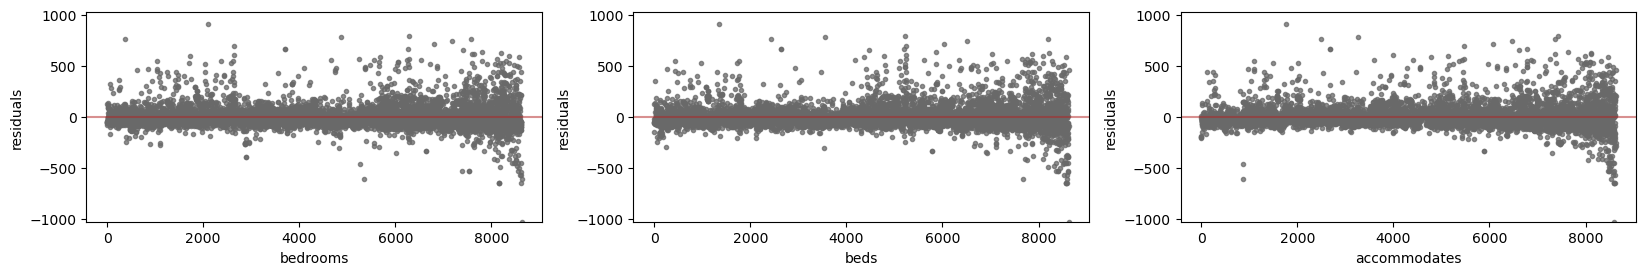

array([ -52.47591328, -102.43881373,   -7.41724954, ..., -108.79778909,
          1.67933328,  -22.21905599])

In [9]:
plot_residuals(result1, ["bedrooms", "beds", "accommodates"])

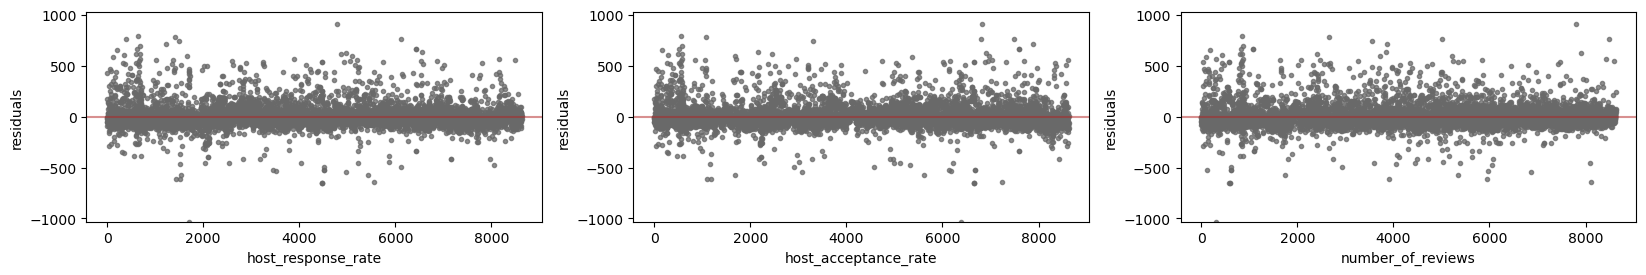

array([ -52.47591328, -102.43881373,   -7.41724954, ..., -108.79778909,
          1.67933328,  -22.21905599])

In [10]:
plot_residuals(result1, ["host_response_rate", "host_acceptance_rate", "number_of_reviews"])

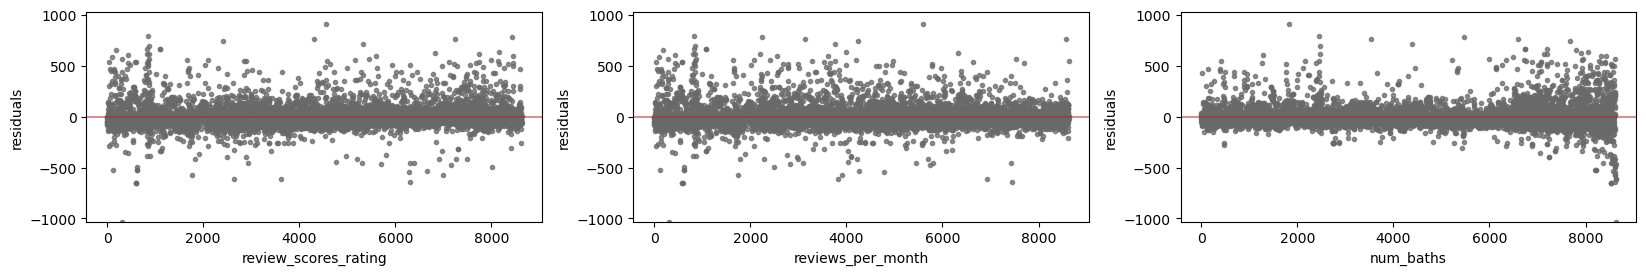

array([ -52.47591328, -102.43881373,   -7.41724954, ..., -108.79778909,
          1.67933328,  -22.21905599])

In [11]:
plot_residuals(result1, ["review_scores_rating", "reviews_per_month", "num_baths"])

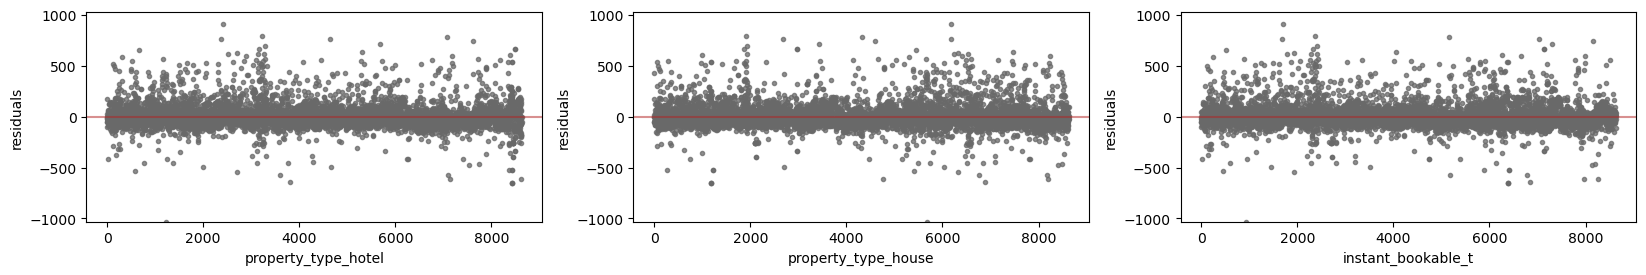

array([ -52.47591328, -102.43881373,   -7.41724954, ..., -108.79778909,
          1.67933328,  -22.21905599])

In [12]:
plot_residuals(result1, ["property_type_hotel", "property_type_house", "instant_bookable_t"])

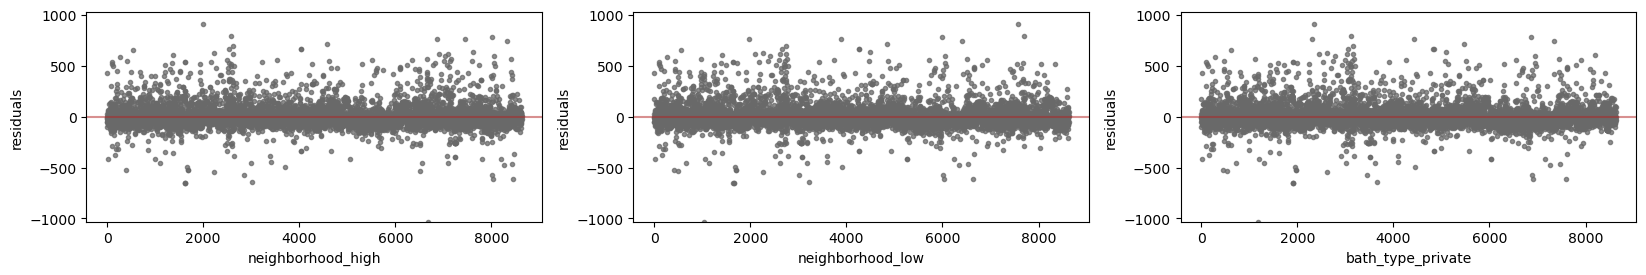

array([ -52.47591328, -102.43881373,   -7.41724954, ..., -108.79778909,
          1.67933328,  -22.21905599])

In [13]:
plot_residuals(result1, ["neighborhood_high", "neighborhood_low", "bath_type_private"])

## Transformations

## Interaction Terms

## Null Model Comparison

## Prediction

In [14]:
#prediction = result5["model"].predict([[.78, 8, math.log(307), math.log(3504), 12, 12*math.log(130), 70, 0, 0]])
#prediction

In [15]:
#prediction[0][0] - 1.96 * result5["sigma"], prediction[0][0] + 1.96 * result5["sigma"]